## Distribuição Binomial

In [1]:
import pandas as pd
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

In [2]:
from scipy.special import comb

#Qual a probabilidade de sucesso
n = 10
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

In [3]:
#Qual a probabilidade de fracasso
q = 1 - p
q

0.6666666666666667

In [4]:
#Qual o total de eventos que deseja obter sucesso
k = 5

In [5]:
probabilidade = (comb(n, k)) * (p ** k) * (q ** (n - k))
print('%0.8f' % probabilidade)

0.13656455


In [6]:
from scipy.stats import binom

probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.13656455


In [7]:
#Probabilidade do candidato passar
binom.sf(4, n, p)

0.21312808006909525

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

In [8]:
p = 0.6
n = 12
k = 8

probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


In [9]:
equipes = 30 * probabilidade
equipes

6.3852281856

## Distribuição de Poisson

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

In [10]:
import numpy as np

media = 20
k = 15

probabilidade = ((np.e ** (-media)) * (media ** k)) / (np.math.factorial(k))
print('%0.8f' % probabilidade)

0.05164885


In [11]:
from scipy.stats import poisson

probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)

0.05164885


In [12]:
#Tabela normal padronizada
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
...,...,...,...,...,...,...,...,...,...,...
3.50,0.9998,0.9998,0.9998,0.9998,0.9998,0.9998,0.9998,0.9998,0.9998,0.9998
3.60,0.9998,0.9998,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999
3.70,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999
3.80,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999


## Amostragem

In [13]:
dados.shape[0]

76840

In [14]:
dados.Renda.mean()

2000.3831988547631

In [15]:
amostra = dados.sample(n = 1000, random_state = 101)
amostra.shape[0]

1000

In [16]:
amostra.Renda.mean()

1998.783

In [17]:
dados.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [18]:
amostra.Sexo.value_counts(normalize = True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

## Estimação

In [19]:
n = 2000
total_de_amostras = 1500

amostras = pd.DataFrame()
amostras

""


In [20]:
amostras.mean()

Series([], dtype: float64)

<AxesSubplot:>

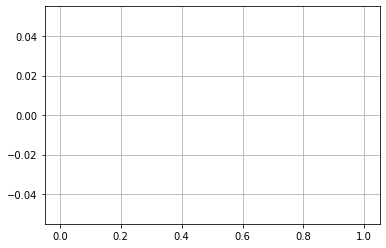

In [21]:
amostras.mean().hist()

In [22]:
dados.Idade.mean()

44.07142113482561

In [23]:
amostras.mean().mean()

nan

In [24]:
amostras.mean().std()

nan

In [25]:
dados.Idade.std()

12.48058346535974

In [26]:
dados.Idade.std() / np.sqrt(n)

0.27907433027404266